In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://aukera.es/blog/variables-ciclicas/

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/3. EDA/data_ready.parquet')
df_meteo = pd.read_parquet('/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/4. FEATURE ENGINEERING/meteo_features.parquet')
df_meteo2 = pd.read_csv('/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/4. FEATURE ENGINEERING/METEO/precipitacionsbcndesde1786_2023_long.csv')
df_temp = pd.read_csv('/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/4. FEATURE ENGINEERING/METEO/temperaturesbcndesde1780_2023_long.csv')

In [4]:
PATH_PREDICT = '/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/5. MODEL/Submission Samples/Copy of metadata_sample_submission_2024.csv'
path_MD = '/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/INFO ESTACIONS BICING/Informacio_Estacions_Bicing.csv'

In [5]:
df_info = pd.read_csv(path_MD)
df_predict = pd.read_csv(PATH_PREDICT)
df_predict = df_predict.merge(df_info[['station_id', 'capacity','lat','lon','altitude','address']], on='station_id', how='left')

In [6]:
df

,station_id,num_docks_available,month,day,hour,year,capacity,lat,lon,altitude,address,percentage_docks_available,ctx_1,ctx_2,ctx_3,ctx_4
0,1,5.500000,1,1,0,2021,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.12,NaN,NaN,NaN,NaN
1,1,5.000000,1,1,1,2021,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.11,0.12,NaN,NaN,NaN
2,1,5.000000,1,1,2,2021,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.11,0.11,0.12,NaN,NaN
3,1,5.000000,1,1,3,2021,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.11,0.11,0.11,0.12,NaN
4,1,5.000000,1,1,4,2021,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.11,0.11,0.11,0.11,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073737,519,18.416667,12,31,19,2023,24,41.424655,2.166289,110.0,"C/ PEDRELL, 52",0.77,0.87,0.85,0.83,0.89
12073738,519,17.166667,12,31,20,2023,24,41.424655,2.166289,110.0,"C/ PEDRELL, 52",0.72,0.77,0.87,0.85,0.83
12073739,519,16.416667,12,31,21,2023,24,41.424655,2.166289,110.0,"C/ PEDRELL, 52",0.68,0.72,0.77,0.87,0.85
12073740,519,16.000000,12,31,22,2023,24,41.424655,2.166289,110.0,"C/ PEDRELL, 52",0.67,0.68,0.72,0.77,0.87


In [7]:
df_predict = df_predict.drop(['index'], axis=1)

In [8]:
df_predict = df_predict.sort_values(by=['station_id', 'month', 'day', 'hour'])
df_predict

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,capacity,lat,lon,altitude,address
0,1,1,1,5,0.781481,0.677778,0.696296,0.750000,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760"
1,1,1,1,10,0.737374,0.711111,0.711111,0.731624,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760"
2,1,1,1,15,0.827778,0.896296,0.901852,0.883333,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760"
3,1,1,1,20,0.825926,0.874074,0.927778,0.918519,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760"
1905,1,1,2,1,0.712963,0.777778,0.814815,0.790741,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171897,496,3,31,1,0.828704,0.787037,0.777778,0.853535,18,41.404862,2.174799,33.0,"C/ PROVENÇA, 445"
171898,496,3,31,6,0.930556,0.944444,0.935185,0.856481,18,41.404862,2.174799,33.0,"C/ PROVENÇA, 445"
171899,496,3,31,11,0.912037,0.884259,0.518519,0.157407,18,41.404862,2.174799,33.0,"C/ PROVENÇA, 445"
171900,496,3,31,16,0.245370,0.319444,0.277778,0.305556,18,41.404862,2.174799,33.0,"C/ PROVENÇA, 445"


In [9]:
df_predict['year'] = 2024

In [10]:
columnas = df.columns.tolist()
columnas_ctx = ['ctx_4', 'ctx_3', 'ctx_2', 'ctx_1','capacity','lat','lon','altitude','address']

columnas_reordenadas = [col for col in columnas if col not in columnas_ctx] + columnas_ctx

df = df[columnas_reordenadas]

In [11]:
def transformar_variable_ciclica(df, column_name, period):
    sin_column = f'{column_name}_sin'
    cos_column = f'{column_name}_cos'

    if column_name == 'hour':
        df[sin_column] = df[column_name].apply(lambda x: math.sin(2 * math.pi * (x - 1) / period))
        df[cos_column] = df[column_name].apply(lambda x: math.cos(2 * math.pi * (x - 1) / period))
    else:
        df[sin_column] = df[column_name].apply(lambda x: math.sin(2 * math.pi * x / period))
        df[cos_column] = df[column_name].apply(lambda x: math.cos(2 * math.pi * x / period))

    return df





In [12]:
df = transformar_variable_ciclica(df, 'month', 12)
df = transformar_variable_ciclica(df, 'hour', 24)
df_predict = transformar_variable_ciclica(df_predict, 'month', 12)
df_predict = transformar_variable_ciclica(df_predict, 'hour', 24)

<ipython-input-11-b765dd5db66a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sin_column] = df[column_name].apply(lambda x: math.sin(2 * math.pi * x / period))
<ipython-input-11-b765dd5db66a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cos_column] = df[column_name].apply(lambda x: math.cos(2 * math.pi * x / period))
<ipython-input-11-b765dd5db66a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [13]:
df.columns

Index(['station_id', 'num_docks_available', 'month', 'day', 'hour', 'year',
       'percentage_docks_available', 'ctx_4', 'ctx_3', 'ctx_2', 'ctx_1',
       'capacity', 'lat', 'lon', 'altitude', 'address', 'month_sin',
       'month_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [14]:
df_predict.columns

Index(['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3', 'ctx-2',
       'ctx-1', 'capacity', 'lat', 'lon', 'altitude', 'address', 'year',
       'month_sin', 'month_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

### VAMOS A HACER MERGE


In [15]:
df_meteo.columns

Index(['tmed', 'prec', 'velmedia', 'year', 'month', 'day', 'day_week'], dtype='object')

In [16]:
df = df.merge(df_meteo[['tmed', 'prec', 'velmedia', 'year', 'month', 'day', 'day_week']], left_on=['year', 'month','day'], right_on=['year', 'month','day'], how='left')
df_predict = df_predict.merge(df_meteo[['tmed', 'prec', 'velmedia', 'year', 'month', 'day', 'day_week']], left_on=['year', 'month','day'], right_on=['year', 'month','day'], how='left')

In [17]:
df.head(2)

,station_id,num_docks_available,month,day,hour,year,percentage_docks_available,ctx_4,ctx_3,ctx_2,ctx_1,capacity,lat,lon,altitude,address,month_sin,month_cos,hour_sin,hour_cos,tmed,prec,velmedia,day_week
0,1,5.5,1,1,0,2021,0.12,NaN,NaN,NaN,NaN,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.5,0.866025,-0.258819,0.965926,"8,1","0,0","1,9",4.0
1,1,5.0,1,1,1,2021,0.11,NaN,NaN,NaN,0.12,45,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",0.5,0.866025,0.000000,1.000000,"8,1","0,0","1,9",4.0


In [18]:
df = df.drop(['address','num_docks_available'], axis=1)
df_predict = df_predict.drop(['address'], axis=1)

In [19]:
df_meteo2.rename(columns={'Any': 'year', 'Mes': 'month'}, inplace=True)
df_meteo2['year'] = df_meteo2['year'].astype('int32')
df_meteo2['month'] = df_meteo2['month'].astype('int32')
df_meteo2['Precipitacions'] = df_meteo2['Precipitacions'].astype('object')
df_meteo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            2856 non-null   int32 
 1   month           2856 non-null   int32 
 2   Desc_Mes        2856 non-null   object
 3   Precipitacions  2856 non-null   object
dtypes: int32(2), object(2)
memory usage: 67.1+ KB


In [20]:
df_temp.rename(columns={'Any': 'year', 'Mes': 'month'}, inplace=True)
df_temp['year'] = df_temp['year'].astype('int32')
df_temp['month'] = df_temp['month'].astype('int32')
df_temp['Temperatura'] = df_temp['Temperatura'].astype('object')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         2928 non-null   int32 
 1   month        2928 non-null   int32 
 2   Desc_Mes     2928 non-null   object
 3   Temperatura  2928 non-null   object
dtypes: int32(2), object(2)
memory usage: 68.8+ KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12085794 entries, 0 to 12085793
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  int64  
 1   month                       int32  
 2   day                         int32  
 3   hour                        int32  
 4   year                        int64  
 5   percentage_docks_available  float64
 6   ctx_4                       float64
 7   ctx_3                       float64
 8   ctx_2                       float64
 9   ctx_1                       float64
 10  capacity                    int64  
 11  lat                         float64
 12  lon                         float64
 13  altitude                    float64
 14  month_sin                   float64
 15  month_cos                   float64
 16  hour_sin                    float64
 17  hour_cos                    float64
 18  tmed                        object 
 19  prec               

In [22]:
df = df.merge(df_meteo2[['year', 'month', 'Precipitacions']], left_on=['year', 'month'], right_on=['year', 'month'], how='left')
df = df.merge(df_temp[['year', 'month', 'Temperatura']], left_on=['year', 'month'], right_on=['year', 'month'], how='left')

In [23]:
df.isnull().sum()

station_id                          0
month                               0
day                                 0
hour                                0
year                                0
percentage_docks_available          0
ctx_4                            2024
ctx_3                            1518
ctx_2                            1012
ctx_1                             506
capacity                            0
lat                                 0
lon                                 0
altitude                            0
month_sin                           0
month_cos                           0
hour_sin                            0
hour_cos                            0
tmed                          3608577
prec                          3615774
velmedia                      3596647
day_week                      3596647
Precipitacions                      0
Temperatura                         0
dtype: int64

In [24]:
df = df.drop(['day_week','velmedia'], axis=1)
df_predict = df_predict.drop(['day_week','velmedia'], axis=1)

In [25]:
df['tmed'].fillna(df['Temperatura'], inplace=True)
df['prec'].fillna(df['Precipitacions'], inplace=True)

In [26]:
df = df.drop(['Temperatura','Precipitacions'], axis=1)

In [27]:
df.dropna(inplace = True)

In [28]:
df_predict.isnull().sum()

station_id    0
month         0
day           0
hour          0
ctx-4         0
ctx-3         0
ctx-2         0
ctx-1         0
capacity      0
lat           0
lon           0
altitude      0
year          0
month_sin     0
month_cos     0
hour_sin      0
hour_cos      0
tmed          0
prec          0
dtype: int64

In [29]:
def convert_to_float(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(',', '.').astype(float)
    return df

columns_to_convert = ['tmed', 'prec']

In [30]:
df = convert_to_float(df, columns_to_convert)
df_predict = convert_to_float(df_predict, columns_to_convert)

<Axes: >

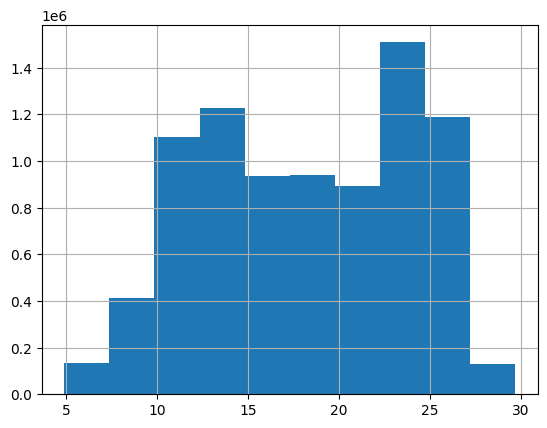

In [31]:
df['tmed'].hist()

<Axes: >

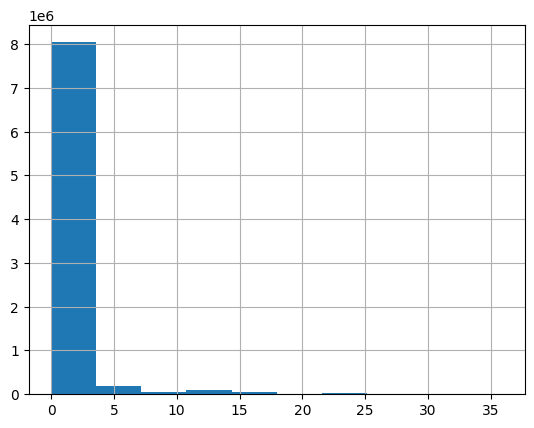

In [32]:
df['prec'].hist()

In [33]:
# Definimos una función que categoriza la temperatura
def categorizar_temperatura(temp):
    if temp < 10:
        return 'Frío'
    elif 10 <= temp < 15:
        return 'Fresco'
    elif 15 <= temp < 24:
        return 'Templado'
    elif 24 <= temp < 30:
        return 'Cálido'
    else:
        return 'Caluroso'


In [34]:

# Aplicamos la función a la columna 'tmed' usando .apply y la asignamos a una nueva columna 'categoria_temperatura'
df['categoria_temperatura'] = df['tmed'].apply(categorizar_temperatura)
df_predict['categoria_temperatura'] = df_predict['tmed'].apply(categorizar_temperatura)


In [35]:
def categorizar_precipitacion(precip):
    if precip == 0:
        return 'No llueve'
    else:
        return 'Llueve'

In [36]:
# Aplicamos la función a la columna 'precipitacion' usando .apply y la asignamos a una nueva columna 'categoria_precipitacion'
df['categoria_precipitacion'] = df['prec'].apply(categorizar_precipitacion)
df_predict['categoria_precipitacion'] = df_predict['prec'].apply(categorizar_precipitacion)

In [37]:
df = df.drop(['tmed','prec'], axis=1)
df_predict = df_predict.drop(['tmed','prec'], axis=1)

Quitaremos esta variable, no aporta nada

In [38]:
df['categoria_precipitacion'].value_counts(normalize=True)

categoria_precipitacion
No llueve    0.555956
Llueve       0.444044
Name: proportion, dtype: float64

In [39]:
df['categoria_temperatura'].value_counts(normalize=True)

categoria_temperatura
Templado    0.307169
Caluroso    0.298630
Fresco      0.191979
Cálido      0.155957
Frío        0.046266
Name: proportion, dtype: float64

In [40]:
df

,station_id,month,day,hour,year,percentage_docks_available,ctx_4,ctx_3,ctx_2,ctx_1,capacity,lat,lon,altitude,month_sin,month_cos,hour_sin,hour_cos,categoria_temperatura,categoria_precipitacion
4,1,1,1,4,2021,0.11,0.12,0.11,0.11,0.11,45,41.397978,2.180107,16.0,5.000000e-01,0.866025,0.707107,7.071068e-01,Frío,No llueve
5,1,1,1,5,2021,0.07,0.11,0.11,0.11,0.11,45,41.397978,2.180107,16.0,5.000000e-01,0.866025,0.866025,5.000000e-01,Frío,No llueve
6,1,1,1,6,2021,0.03,0.11,0.11,0.11,0.07,45,41.397978,2.180107,16.0,5.000000e-01,0.866025,0.965926,2.588190e-01,Frío,No llueve
7,1,1,1,7,2021,0.06,0.11,0.11,0.07,0.03,45,41.397978,2.180107,16.0,5.000000e-01,0.866025,1.000000,6.123234e-17,Frío,No llueve
8,1,1,1,8,2021,0.46,0.11,0.07,0.03,0.06,45,41.397978,2.180107,16.0,5.000000e-01,0.866025,0.965926,-2.588190e-01,Frío,No llueve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12085789,519,12,31,19,2023,0.77,0.89,0.83,0.85,0.87,24,41.424655,2.166289,110.0,-2.449294e-16,1.000000,-1.000000,-1.836970e-16,Fresco,No llueve
12085790,519,12,31,20,2023,0.72,0.83,0.85,0.87,0.77,24,41.424655,2.166289,110.0,-2.449294e-16,1.000000,-0.965926,2.588190e-01,Fresco,No llueve
12085791,519,12,31,21,2023,0.68,0.85,0.87,0.77,0.72,24,41.424655,2.166289,110.0,-2.449294e-16,1.000000,-0.866025,5.000000e-01,Fresco,No llueve
12085792,519,12,31,22,2023,0.67,0.87,0.77,0.72,0.68,24,41.424655,2.166289,110.0,-2.449294e-16,1.000000,-0.707107,7.071068e-01,Fresco,No llueve


In [42]:
df_predict

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,capacity,lat,lon,altitude,year,month_sin,month_cos,hour_sin,hour_cos,categoria_temperatura,categoria_precipitacion
0,1,1,1,5,0.781481,0.677778,0.696296,0.750000,45,41.397978,2.180107,16.0,2024,0.5,8.660254e-01,0.866025,0.500000,Fresco,No llueve
1,1,1,1,10,0.737374,0.711111,0.711111,0.731624,45,41.397978,2.180107,16.0,2024,0.5,8.660254e-01,0.707107,-0.707107,Fresco,No llueve
2,1,1,1,15,0.827778,0.896296,0.901852,0.883333,45,41.397978,2.180107,16.0,2024,0.5,8.660254e-01,-0.500000,-0.866025,Fresco,No llueve
3,1,1,1,20,0.825926,0.874074,0.927778,0.918519,45,41.397978,2.180107,16.0,2024,0.5,8.660254e-01,-0.965926,0.258819,Fresco,No llueve
4,1,1,2,1,0.712963,0.777778,0.814815,0.790741,45,41.397978,2.180107,16.0,2024,0.5,8.660254e-01,0.000000,1.000000,Fresco,No llueve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171897,496,3,31,1,0.828704,0.787037,0.777778,0.853535,18,41.404862,2.174799,33.0,2024,1.0,6.123234e-17,0.000000,1.000000,Fresco,Llueve
171898,496,3,31,6,0.930556,0.944444,0.935185,0.856481,18,41.404862,2.174799,33.0,2024,1.0,6.123234e-17,0.965926,0.258819,Fresco,Llueve
171899,496,3,31,11,0.912037,0.884259,0.518519,0.157407,18,41.404862,2.174799,33.0,2024,1.0,6.123234e-17,0.500000,-0.866025,Fresco,Llueve
171900,496,3,31,16,0.245370,0.319444,0.277778,0.305556,18,41.404862,2.174799,33.0,2024,1.0,6.123234e-17,-0.707107,-0.707107,Fresco,Llueve


In [41]:
# Save the final DataFrame as a pickle file
parquet_path = '/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/5. MODEL/data_features.parquet'
df.to_parquet(parquet_path)

parquet_path_predict = '/content/drive/MyDrive/Data Science CapstoneProject/Bicing_Capstone/5. MODEL/predict_data.parquet'
df_predict.to_parquet(parquet_path_predict)